In [86]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
import pandas as pd
import seaborn as sns


# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [87]:
# Define a function for opening the dataset
def load_dataset(file_path):
    return pd.read_csv(file_path)

In [88]:
# Open dataset for processing:
DATASET_PATH_CSV = "../data/data.csv"

# ufc dataset:
ufc = load_dataset(DATASET_PATH_CSV)

# Data description and preprocessing

In [89]:
ufc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5144 entries, 0 to 5143
Columns: 145 entries, R_fighter to R_age
dtypes: bool(1), float64(134), int64(1), object(9)
memory usage: 5.7+ MB


Obtain relevant information about the dataset's datatypes, this way we can know if we have to change something within the dataset for further processing.

In [90]:
ufc.describe()

,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_BODY_att,B_avg_BODY_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,...,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
count,5144.000000,5144.000000,5144.000000,5144.0,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,3879.000000,...,5144.000000,5144.000000,5144.000000,5144.000000,5144.000000,5140.000000,4828.000000,5141.000000,4972.000000,5080.000000
mean,3.119362,0.429821,0.837286,0.0,8.689387,6.083457,8.240461,5.556352,53.156807,19.329445,...,1.177294,1.254860,0.777605,0.071345,3.598173,179.274089,183.664412,172.075861,29.171963,29.442323
std,0.631457,0.731325,1.306203,0.0,7.087703,5.074464,7.575422,5.429531,41.252426,15.961112,...,1.600135,1.801056,1.326056,0.277771,3.709519,8.638978,10.304375,35.164075,4.078538,4.141927
min,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,152.400000,152.400000,115.000000,18.000000,19.000000
25%,3.000000,0.000000,0.000000,0.0,3.500000,2.333333,3.000000,2.000000,22.000000,7.666667,...,0.000000,0.000000,0.000000,0.000000,1.000000,172.720000,177.800000,145.000000,26.000000,26.000000
50%,3.000000,0.000000,0.000000,0.0,7.000000,5.000000,6.333333,4.200000,44.666667,15.200000,...,1.000000,1.000000,0.000000,0.000000,2.000000,180.340000,182.880000,170.000000,29.000000,29.000000
75%,3.000000,1.000000,1.000000,0.0,12.225000,8.500000,11.422222,7.738636,74.333333,27.142857,...,2.000000,2.000000,1.000000,0.000000,5.000000,185.420000,190.500000,185.000000,32.000000,32.000000
max,5.000000,6.000000,13.000000,0.0,49.000000,39.000000,87.000000,68.000000,271.000000,130.000000,...,10.000000,11.000000,13.000000,2.000000,20.000000,210.820000,213.360000,345.000000,51.000000,47.000000


In [91]:
ufc.describe(include=['O'])

,R_fighter,B_fighter,Referee,date,location,Winner,weight_class,B_Stance,R_Stance
count,5144,5144,5121,5144,5144,5144,5144,4985,5010
unique,1334,1774,190,476,157,3,14,5,5
top,Jim Miller,Jeremy Stephens,Herb Dean,2016-11-19,"Las Vegas, Nevada, USA",Red,Lightweight,Orthodox,Orthodox
freq,23,19,726,25,1216,3470,989,3829,3807


# Important notes to observe
1.- Red side wins more frequently than blue side (3470/5144 = 67%).

2.- Jeremy Stephens fights more frequently in the blue side than any other

3.- Jim Miller fights in the red side more frequently than any other

4.- Herb Dean has been the most frequently appearing referee, being in 726 of 5121 total fights.

5.- 2016 has been the year with most fights (476 of 5144)




Let's fill up NaN values using pandas

In [92]:
ufc.fillna(value=0,inplace=True)


In [93]:
# Let's see only the first entires in the dataset:
ufc.head()

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,...,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Henry Cejudo,Marlon Moraes,Marc Goddard,2019-06-08,"Chicago, Illinois, USA",Red,True,Bantamweight,5,0.0,...,2.0,0.0,0.0,8.0,Orthodox,162.56,162.56,135.0,31.0,32.0
1,Valentina Shevchenko,Jessica Eye,Robert Madrigal,2019-06-08,"Chicago, Illinois, USA",Red,True,Women's Flyweight,5,0.0,...,0.0,2.0,0.0,5.0,Southpaw,165.10,167.64,125.0,32.0,31.0
2,Tony Ferguson,Donald Cerrone,Dan Miragliotta,2019-06-08,"Chicago, Illinois, USA",Red,False,Lightweight,3,0.0,...,3.0,6.0,1.0,14.0,Orthodox,180.34,193.04,155.0,36.0,35.0
3,Jimmie Rivera,Petr Yan,Kevin MacDonald,2019-06-08,"Chicago, Illinois, USA",Blue,False,Bantamweight,3,0.0,...,1.0,0.0,0.0,6.0,Orthodox,162.56,172.72,135.0,26.0,29.0
4,Tai Tuivasa,Blagoy Ivanov,Dan Miragliotta,2019-06-08,"Chicago, Illinois, USA",Blue,False,Heavyweight,3,0.0,...,2.0,0.0,0.0,3.0,Southpaw,187.96,190.50,264.0,32.0,26.0


In [94]:
ufc.tail()

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,no_of_rounds,B_current_lose_streak,...,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
5139,Gerard Gordeau,Kevin Rosier,Joao Alberto Barreto,1993-11-12,"Denver, Colorado, USA",Red,False,Open Weight,1,0.0,...,1.0,0.0,0.0,1.0,Orthodox,195.58,0.00,216.0,0.0,34.0
5140,Ken Shamrock,Patrick Smith,Joao Alberto Barreto,1993-11-12,"Denver, Colorado, USA",Red,False,Open Weight,1,0.0,...,0.0,0.0,0.0,0.0,Orthodox,185.42,182.88,205.0,30.0,29.0
5141,Royce Gracie,Art Jimmerson,Joao Alberto Barreto,1993-11-12,"Denver, Colorado, USA",Red,False,Open Weight,1,0.0,...,0.0,0.0,0.0,0.0,Southpaw,185.42,0.00,175.0,30.0,26.0
5142,Kevin Rosier,Zane Frazier,Joao Alberto Barreto,1993-11-12,"Denver, Colorado, USA",Red,False,Open Weight,1,0.0,...,0.0,0.0,0.0,0.0,Orthodox,193.04,0.00,275.0,0.0,0.0
5143,Gerard Gordeau,Teila Tuli,Joao Alberto Barreto,1993-11-12,"Denver, Colorado, USA",Red,False,Open Weight,1,0.0,...,0.0,0.0,0.0,0.0,Orthodox,195.58,0.00,216.0,24.0,34.0


We will make a correlation matrix to attempt to view relevant information within the dataset

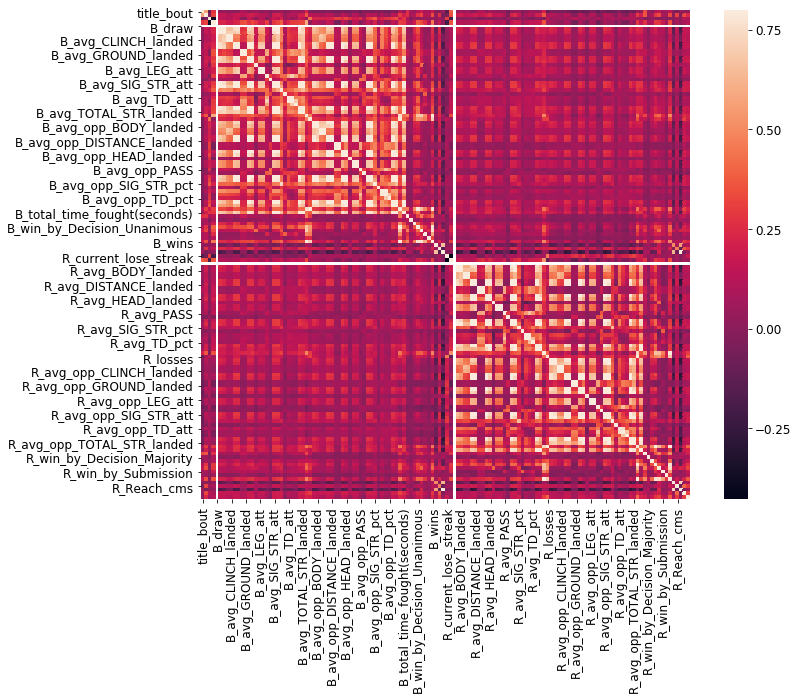

In [95]:
# Lets make a correlation matrix:
corr_matrix = ufc.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr_matrix, vmax=.8, square=True);


In [96]:
# Correlation matrix to see what variables relate the most
corr_matrix

,title_bout,no_of_rounds,B_current_lose_streak,B_current_win_streak,B_draw,B_avg_BODY_att,B_avg_BODY_landed,B_avg_CLINCH_att,B_avg_CLINCH_landed,B_avg_DISTANCE_att,...,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_wins,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
title_bout,1.000000,0.565275,-0.113118,0.273570,NaN,0.011810,0.020013,0.013544,0.017333,0.002699,...,0.100260,0.148580,0.057341,0.048505,0.141807,0.008619,-0.053037,0.044122,0.013028,0.010130
no_of_rounds,0.565275,1.000000,-0.032804,0.315395,NaN,0.162492,0.165711,0.122907,0.123626,0.169201,...,0.278287,0.330225,0.086974,0.050100,0.332757,0.003948,0.306090,-0.033220,0.325517,0.241522
B_current_lose_streak,-0.113118,-0.032804,1.000000,-0.376812,NaN,0.147068,0.127420,0.129572,0.112549,0.182645,...,-0.013458,-0.002140,0.002549,-0.009327,-0.001760,-0.000799,0.057740,0.007993,0.143665,0.069285
B_current_win_streak,0.273570,0.315395,-0.376812,1.000000,NaN,0.224810,0.230912,0.190631,0.188910,0.219810,...,0.289728,0.275831,0.176900,0.058261,0.346298,0.022086,0.081969,0.030288,0.092590,0.128414
B_draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
R_Height_cms,0.008619,0.003948,-0.000799,0.022086,NaN,-0.142063,-0.117599,-0.043199,-0.041109,-0.144077,...,-0.078054,0.190764,0.065403,0.026936,0.074553,1.000000,0.126107,0.719002,0.035919,0.098125
R_Reach_cms,-0.053037,0.306090,0.057740,0.081969,NaN,0.143202,0.142599,0.113679,0.115974,0.153627,...,0.151612,0.163303,0.070209,0.027714,0.185382,0.126107,1.000000,-0.069260,0.409086,0.294007
R_Weight_lbs,0.044122,-0.033220,0.007993,0.030288,NaN,-0.194886,-0.159643,-0.061541,-0.055128,-0.209746,...,-0.111237,0.240319,0.002257,0.049813,0.063624,0.719002,-0.069260,1.000000,-0.035534,0.059627
B_age,0.013028,0.325517,0.143665,0.092590,NaN,0.170508,0.170820,0.158217,0.162366,0.167931,...,0.176596,0.205406,0.070224,0.047274,0.225131,0.035919,0.409086,-0.035534,1.000000,0.305077


This, as a first glimpse of the dataset, could give us really relevant information: We now know that the number of body shots landed, is directly and is most correlated to the number of body shots attempted.
We also know that the most SIGNIFICANT shots the fighter has given another, the most likely it is to land more shots, but this might not come as the most new information